# 7. Gyakorlat - 1 DoF negyed-jármű modell
2021.03.22.

## Feladat:

In [1]:
from IPython.display import Image
Image(filename='gyak7_1.png',width=600)

A mellékelt ábrán egy negyed-jármű modell látható, mellyel a jármű függőleges dinamikáját lehet vizsgáni. A gyakorlatban a lengéscsillapító merevségét és csillapítási tényezőjét az útviszonyoknak megfelelően, a komfort szempotokat kielégítve szokták beállítani. A negyed-jármű tömegét $m$, a lengéscsilapító egyenértékű merevségét $k$, csillapítási tényezőjét $c$ jelöli. A jármű longitudinális sebesség komponense $v$ konstans, míg a harmonikus útprofil miatt a függőleges sebesség komponenst az $r(t) = R\sin(\omega t)$ függvénnyel lehet megadni, ahol $R$ az út egyenetlenségének amplitúdója, $\omega$ pedig a gerjesztési frekvencia, melyet a $v$ sebesség és az $L$ hullámhossz határoz meg. A mozgás leírásáshoz az $y(t)$ általános koordinátát használjuk. A gravitációs hatást elhanyagoljuk és feltételezzük, hogy a kerék sosem emelkedik el a talajtól.

### Adatok:
|||
|---------------------------|---------------------------|
| $m$ = 300 kg              | $v$ = 36 km/h = 10 m/s    |
| $k$ = 2$\cdot$10$^5$ N/m  | $R$ = 0,04 m              |
| $c$ = 9800 Ns/m           | $L$ = 1,2 m               |
| $r(t)$ = $R\sin(\omega t)$|

### Részfeladatok:

1. Írja fel a negyed-jármű modell mozgásegyenletét!
2. Számítsa ki a csillapított és a csillapítatlan rendszer sajátkörfrekvenciáját, a relatív csillapítási tényezőt, a frekvencia hányadost és a statikus deformációt!
3. Határozza meg az állandósult állapotot leíró mozgástörvényt $y_p(t) = Y\sin(\omega t+\delta-\vartheta)$ alakban!
4. Határozza meg a stacionárius állapotban a csillapító erő maximumát ($F_{d,max}$)!

## Megoldás:

In [2]:
from IPython.display import Image
Image(filename='gyak7_2.png',width=500)

## 1. Feladat:
A fenti ábrán a negyed-jármű modell szabadtest ábrája látható egy kitérített pozícióban. A mozgás egyenlet Newton II alapján:

\begin{equation}
    \dot{\mathbf{I}}=\mathbf{F}.
\end{equation}

Mivel most csak a függőleges mozgásra vagyunk kíváncsiak, ezért a mozgásegyenlet a következő alakban adódik

\begin{equation}
    m\ddot{y} = -F_s(t)-F_d(t),
\end{equation}

ahol $F_s(t)$ és $F_d(t)$ a rugóerő és a csillapítóerő

\begin{equation}
    F_s(t) = k(y-r(t)),
\end{equation}
\begin{equation}
    F_d(t) = c(\dot{y}-\dot{r}(t)).
\end{equation}

In [3]:
import sympy as sp
from IPython.display import display, Math

sp.init_printing()

In [4]:
## Függvények, szimbólumok definiálása

m, k, c, v, R, L, ω= sp.symbols("m, k, c, v, R, L, ω", real=True)

# Készítsünk behelyettesítési listát az adatok alapján, SI-ben
adatok = [(m, 300), (k, 2*10**5), (c, 9300), (v,10), (R, 0.04), (L, 1.2)]

#általános koordináta
t = sp.symbols("t",real=True, positive=True)
y = sp.Function('y')(t)

# Útgerjesztés
r = R*sp.sin(ω*t)

# Rugóerő, csillapítóerő
F_s = k*(y-r)
F_c = c*(y.diff(t)-r.diff(t))
display(Math('F_s = {}'.format(sp.latex(F_s))),Math('F_c = {}'.format(sp.latex(F_c))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# A gerjesztési frekvencia a hullámhosszal és a longitudinális sebességgel fejezhető ki

# periódusidő
T_g = L/v

# gerjesztési körfrekvencia
# Ennek a mennyiségnek hozzunk létre egy új változót és ne a korábban használt ω-t írjuk felül
# (Ez azért fontos, mert az ω szimbólum már szerepel az útgerjesztés kifejezésében és ott nem fog felülíródni)
ω_g = 2*sp.pi/T_g
display(Math('ω_g = {}'.format(sp.latex(ω_g))))

# Numerikusan
ω_g_num = ω_g.subs(adatok).evalf(6)
display(Math('ω_g = {}'.format(sp.latex(ω_g_num))))

# [rad/s]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

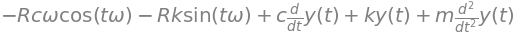

In [6]:
# mozgásegyenlet nullára rendezve
mozgegy = (m*y.diff(t,2)+F_s+F_c).apart(y)
mozgegy

A mozgásegyenletben a gerjesztés az alább egyszerűsített alakra hozható:

\begin{equation}
    kR\sin(\omega t)+cR\omega\cos(\omega t) = F_0\sin(\omega t+\delta),
\end{equation}

ahol $\delta$ a fáziskésés és $F_0$ a gerjesztés erőamplitúdója. Trigonometrikus azonosságot alkalmazva ez a kifejezés kibontható:

\begin{equation}
    F_0\sin(\omega t+\delta) = F_0\sin(\omega t)\cos(\delta) + F_0\cos(\omega t)\sin(\delta),
\end{equation}

majd összevetve a gerjesztés eredeti alakjavál, az egyenlet két oldalán a szinusz és a koszinusz függvény együtthatói meg kell egyezzenek

\begin{equation}
    kR\sin(\omega t)+cR\omega\cos(\omega t) = F_0\sin(\omega t)\cos(\delta) + F_0\cos(\omega t)\sin(\delta),
\end{equation}

Így ebből $F_0$ és $\delta$ paraméterek meghatározhatók.

In [7]:
δ, F_0 = sp.symbols("δ, F_0")
# A sympy jól ismert expand() függvénye a trigonometrikus azonosságokra nem alkalmazható.
# Szerencsére erre van egy külön függvény, az expand_trig()
# (Megjegyzés: ugyanúgy a simplify() sem alkalmazható trigonometrikus kifejezések egyszerűsétésére,
# abban az esetben a trigsimp() függvény nyújthat segítséget)
gerj_expand = sp.expand_trig(F_0*sp.sin(ω*t+δ)).expand()
gerj_expand

In [8]:
# Most szedjük ki a mozgásegyenletből a gerjesztést
gerj = mozgegy.coeff(y,0) # y nulladik hatványának az együtthatója (a diffegyenlet inhomogenitását okozó tagja)
gerj

In [9]:
# És most oldjuk meg az adódó egyenletrendszert az együtthatókra
egyutthatok = sp.solve([gerj.coeff(sp.sin(ω*t))-gerj_expand.coeff(sp.sin(ω*t)), gerj.coeff(sp.cos(ω*t))-gerj_expand.coeff(sp.cos(ω*t))],F_0,δ)
F_0_val = sp.ratsimp(egyutthatok[1][0]) # A két megoldás közül a pozitívat vesszük ki
δ_val = sp.simplify(egyutthatok[0][1])
display(Math('F_0 = {}'.format(sp.latex(F_0_val))), Math('δ = {}'.format(sp.latex(δ_val))))

# numerikusan
F_0_num = F_0_val.subs(ω, ω_g).subs(adatok).evalf(8)
δ_num = δ_val.subs(ω, ω_g).subs(adatok).evalf(5)
display(Math('F_0 = {}'.format(sp.latex(F_0_num))), Math('δ = {}'.format(sp.latex(δ_num))))

# [N]
# [rad]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2. Feladat

In [10]:
# Mozgásegyenlet leosztása a főegyütthatóval
mozgegy = (mozgegy/mozgegy.coeff(y.diff(t,2))).expand()

# csillapítatlan sajátkörfrekvencia
ω_n = sp.sqrt(mozgegy.coeff(y))

# frekvenciahányados
λ = ω_g/ω_n

# Relatív csillapítási tényező
ζ = mozgegy.coeff(y.diff(t))/(2*ω_n)

# csillapított sajátkörfrekvencia
ω_d = ω_n*sp.sqrt(1-ζ**2)

# statikus deformáció
f_0 = F_0_val/(ω_n**2*m)

## Numerikusan

ω_n_num = ω_n.subs(ω, ω_g).subs(adatok).evalf(6)
λ_num = λ.subs(ω, ω_g).subs(adatok).evalf(5)
ζ_num = ζ.subs(ω, ω_g).subs(adatok).evalf(4)
ω_d_num = ω_d.subs(ω, ω_g).subs(adatok).evalf(6)
f_0_num = f_0.subs(ω, ω_g).subs(adatok).evalf(4)

display(Math('ω_n= {}'.format(sp.latex(ω_n_num))), Math('λ = {}'.format(sp.latex(λ_num))))
display(Math('ζ = {}'.format(sp.latex(ζ_num))), Math('ω_d = {}'.format(sp.latex(ω_d_num))))
display(Math('f_0 = {}'.format(sp.latex(f_0_num))))

# [rad/s]
# [1]
# [1]
# [rad/s]
# [m]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 3. Feladat
Az állandósult állapotban a rendszert leíró mozgástörvényt a differenciálegyenlet partikuláris megoldása adja, melyet az alábbi alakra lehet rendezni

\begin{equation}
     y_p(t) = Y_1\sin(\omega t+\delta_1-\vartheta_1),
\end{equation}

ahol $Y$ az állandósult állapotban a rezgés amplitúdó, $\vartheta$ az erőgerjesztéshez képesti fáziskésés, $\delta-\vartheta$ pedig az útgerjesztéshez képesti fáziskésés.

In [11]:
# Az Y rezgésamplitúdó a nagyítási függvény segítségével fejezhető ki
# Nagyítási függvény
N = 1/(sp.sqrt((1-λ)**2+4*ζ**2*λ**2))
N_num = N.subs(adatok).evalf(4)
display(Math('N = {}'.format(sp.latex(N_num))))

## Rezgésamplitúdó
Y = N*f_0
Y_num = Y.subs(ω,ω_g).subs(adatok).evalf(3)
display(Math('Y = {}'.format(sp.latex(Y_num))))

# [1]
# [m]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
# A fáziskésés
ϑ =  sp.atan2(2*ζ*λ,(1-λ**2))
ϑ_num = (ϑ).subs(adatok).evalf(5)
display(Math('ϑ = {}'.format(sp.latex(ϑ_num))))

# [rad]

<IPython.core.display.Math object>

In [13]:
# A partikuláris megoldás
yp =Y*sp.sin(ω*t+δ-ϑ)
yp_num = Y_num*sp.sin(ω*t+δ_num-ϑ_num)
display(Math('y_p = {}'.format(sp.latex(yp_num))))

# [m]

<IPython.core.display.Math object>

## 4. Feladat

A csillíptási erő az alábbi kondenzált formára hozható

\begin{equation}
    F_c(t) = c(\dot{y}_p(t)-\dot{r}(t)) = c \omega(Y\cos(\omega t+\delta-\vartheta)-R\cos(\omega t)) 
\end{equation}

\begin{equation}
    (1) \hspace{20pt} c\omega(Y\cos(\omega t+\delta-\vartheta)-R\cos(\omega t)) = c\omega Y^*\cos(\omega t+\delta^*)
\end{equation}

A csillapítási erő amplitúdója ($Y^*$) az első feladatban ismeretett módon most is meghatározható az (1) egyenlet trigonometrikus bővítésével, majd az együtthatókra adódó egyenletrendszer megoldássával. Nézzük meg hogyan lehetne megkeresni az erőmaximumot numerikus módszer segítségével. Ehhez először célszerű kirajzoltatni a függvényünket.

In [14]:
# Csillapítási erő az állandósult állapotban
F_c_stac = F_c.subs(y, yp).simplify()

# numerikusan az idő függvényeként megadva
F_c_stac_num = (F_c_stac.subs(ω, ω_g).subs(δ, δ_num).subs(adatok)).evalf(5)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

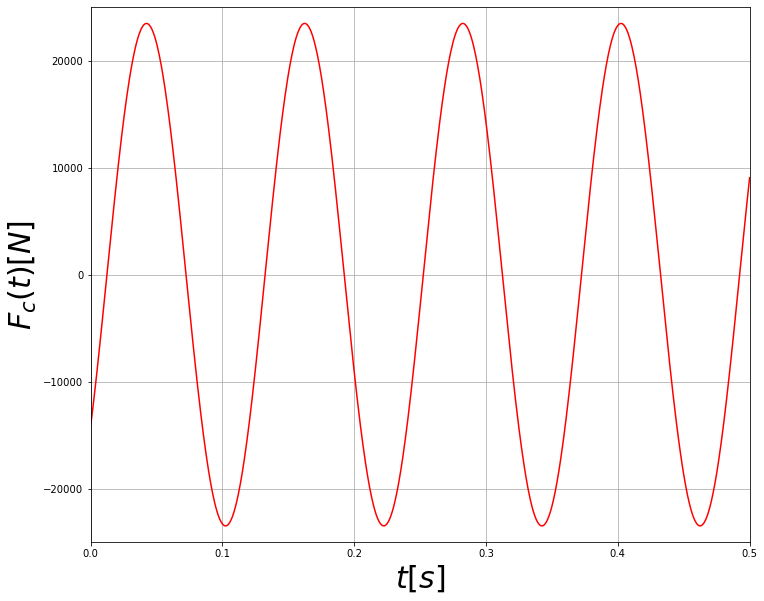

In [16]:
### Csillapítási erőidőfüggvényének ábrázolása

t_val = np.linspace(0,0.5,1000) # lista létrehozása a [0 ; 0,5] intervallum 1000 részre való bontásával 
F_c_val = np.zeros(len(t_val)) # nulla lista létrehozása (ugyanannyi elemszámmal)
# for ciklus segítségével írjuk felül a nulla listában szereplő elemelet az adott x értékhez tartozó y értékekkel
for i in range(len(t_val)):
    F_c_val[i] = F_c_stac_num.subs(t,t_val[i]).evalf()

    
# rajzterület létrehozása    
plt.figure(figsize=(30/2.54,25/2.54))

# függvény kirajzolása az x és y kordináta értékeket tartalmazó listák megadásásval
plt.plot(t_val,F_c_val,color='r',label=r'num_sim')

# tengelyek
axes = plt.gca()
axes.set_xlim([0,t_val[-1]])
axes.set_ylim([-25000, 25000])

# rácsozás
plt.grid()

# tengelyfeliratozás
plt.xlabel(r'$ t [s] $',fontsize=30)
plt.ylabel(r'$ F_c(t) [N] $',fontsize=30)

plt.show()

In [17]:
# Az erőmaximum az erőértékeket tartalmazó listából könnyen kiszedhető a max() függvénnyel
F_c_max = np.around(max(F_c_val),decimals=2) # két tizedesre kerekítve

display(Math('F_{{c,max}} = {}'.format(sp.latex(F_c_max))))

# [N]

<IPython.core.display.Math object>

Készítette: 
    Juhos-Kiss Álmos (Alkalmazott Mechanika Szakosztály) 
    Takács Dénes (BME MM) kidolgozása és ábrái alapján.

        Hibák, javaslatok:
        amsz.bme@gmail.com
        csuzdi02@gmail.com
        almosjuhoskiss@gmail.com

            2021.03.22
        